# Ejemplo de configuración de redes neuronales lineales y no líneales en un problema de regresión. 

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
from tensorflow import keras

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Predicciones con Red Neuronal - API Sequential

Construir, entrenar, evaluar y utilizar un MLP de regresión usando la API secuencial para hacer predicciones es bastante similar a lo que hicimos para la clasificación. Las principales diferencias son el hecho de que la capa de salida tiene una sola neurona (ya que sólo queremos predecir un único valor) y no utiliza ninguna función de activación, y la función de pérdida es el error cuadrático medio. Como el conjunto de datos es bastante ruidoso, utilizamos una sola capa oculta con menos neuronas que antes, para evitar el sobreajuste:


In [25]:
# importando los datasets de sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [48]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['TARGET']=housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.8737 - val_loss: 0.7688
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.6360 - val_loss: 0.6091
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5649 - val_loss: 0.5705
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5354 - val_loss: 0.5174
Epoch 5/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5143 - val_loss: 0.4895
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4965 - val_loss: 0.4710
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4821 - val_loss: 0.4634
Epoch 8/40
363/363 [==============================] - 1s 1ms/step - loss: 0.4702 - val_loss: 0.4442
Epoch 9/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4602 - val_loss: 0.4338
Epoch 10/40
363/363 [==============================] - 1s 2ms/step - loss: 0.4519 - val_loss: 0.4252

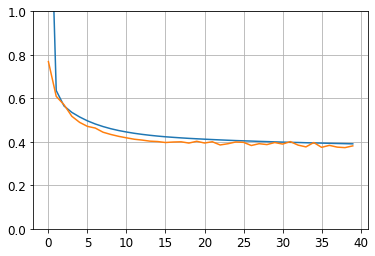

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
X_new = X_test[:3] #toma los 3 primeros valores para hacer predicciones
y_pred = model.predict(X_new)
y_pred

array([[0.6360331],
       [1.7751355],
       [3.6066597]], dtype=float32)

In [53]:
print('Predicted Value :',y_pred[0])
print('Actual Value :',y_test[0])

Predicted Value : [0.6360331]
Actual Value : 0.477


In [11]:
np.random.seed(42)
tf.random.set_seed(42)

 # Red Neuronal no Secuencial

Un ejemplo de red neuronal no secuencial es la red neuronal Wide & Deep. Esta arquitectura de red neuronal se introdujo en un artículo de 2016 de Heng-Tze Cheng et al.14. Conecta todas o parte de las entradas directamente a la capa de salida, como se muestra en la siguiente figura.

Esta arquitectura hace posible que la red neuronal aprenda tanto patrones profundos (utilizando la ruta profunda) como reglas simples (a través de la ruta corta). Por el contrario, un MLP normal obliga a que todos los datos fluyan a través de toda la pila de capas, por lo que los patrones simples de los datos pueden acabar siendo distorsionados por esta secuencia de transfor maciones.


# 1. Confinguración

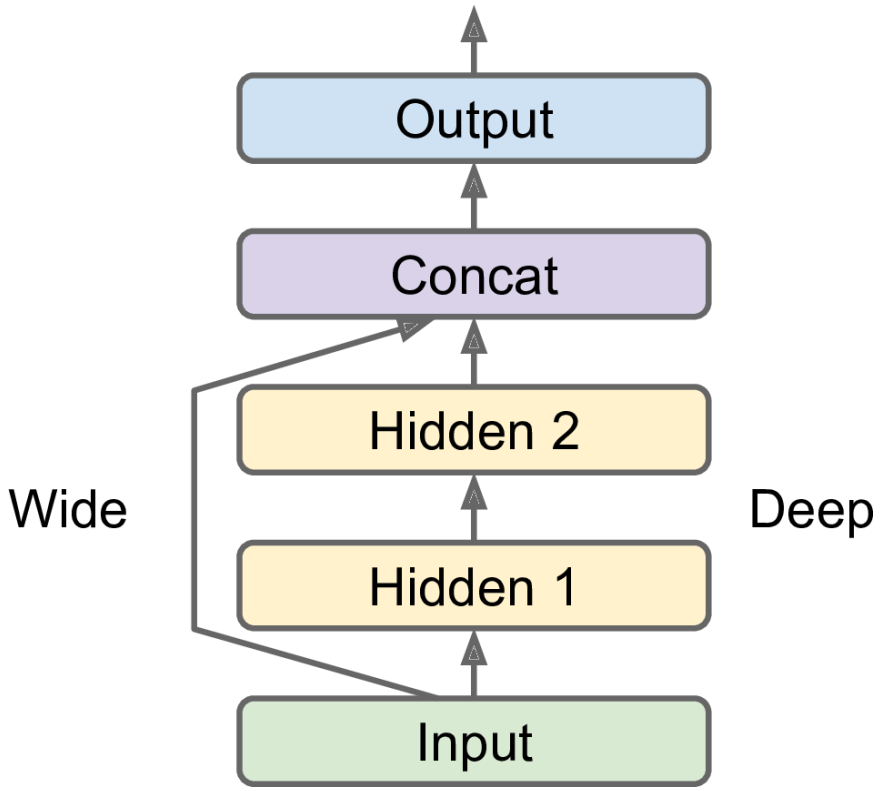



1.   En primer lugar, tenemos que crear un objeto de entrada. Esto es necesario porque podemos tener múltiples entradas, como veremos más adelante.
2.   A continuación, creamos una capa Densa con 30 neuronas y utilizando la función de activación ReLU. Nada más crearla, fíjate que la llamamos como una función, pasándole la entrada. Por eso se llama API Funcional. Observa que sólo le estamos diciendo a Keras cómo debe conectar las capas entre sí, todavía no se están procesando datos reales.
3. A continuación, creamos una segunda capa oculta, y de nuevo la utilizamos como función. Obsérvese que que le pasamos la salida de la primera capa oculta.
4. A continuación, creamos una capa Concatenate(), y de nuevo la utilizamos inmediatamente como una función, para concatenar la entrada y la salida de la segunda capa oculta (puedes preferir la función keras.layers.concatenate(), que crea una capa Con catenate y la llama inmediatamente con las entradas dadas).
5. Luego creamos la capa de salida, con una sola neurona y sin función de activación, y la llamamos como una función, pasándole el resultado de la concatenación.
6. Por último, creamos un Modelo Keras, especificando qué entradas y salidas utilizar. 



In [12]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [14]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4659 - val_loss: 0.4313

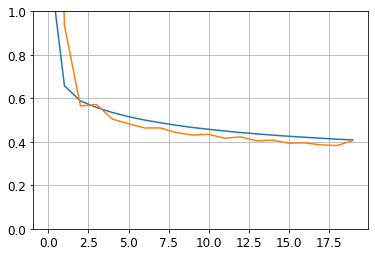

In [18]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [39]:
X_new = X_test[:3] #toma los 3 primeros valores para hacer predicciones
y_pred = model.predict(X_new)
y_pred

array([[0.47011763],
       [1.873529  ],
       [3.3798187 ]], dtype=float32)

# 2. Configuración

¿Qué ocurre si se quiere enviar un subconjunto de características a través de la ruta ancha, y otro subconjunto diferente (posiblemente superpuesto) a través de la ruta profunda (véase la siguiente figura)? En este caso, una solución es utilizar múltiples entradas. Por ejemplo, supongamos que queremos enviar 5 características a través de la ruta profunda (características 0 a 4), y 6 características a través de la ruta ancha (características 2 a 7):


In [19]:
np.random.seed(42)
tf.random.set_seed(42)


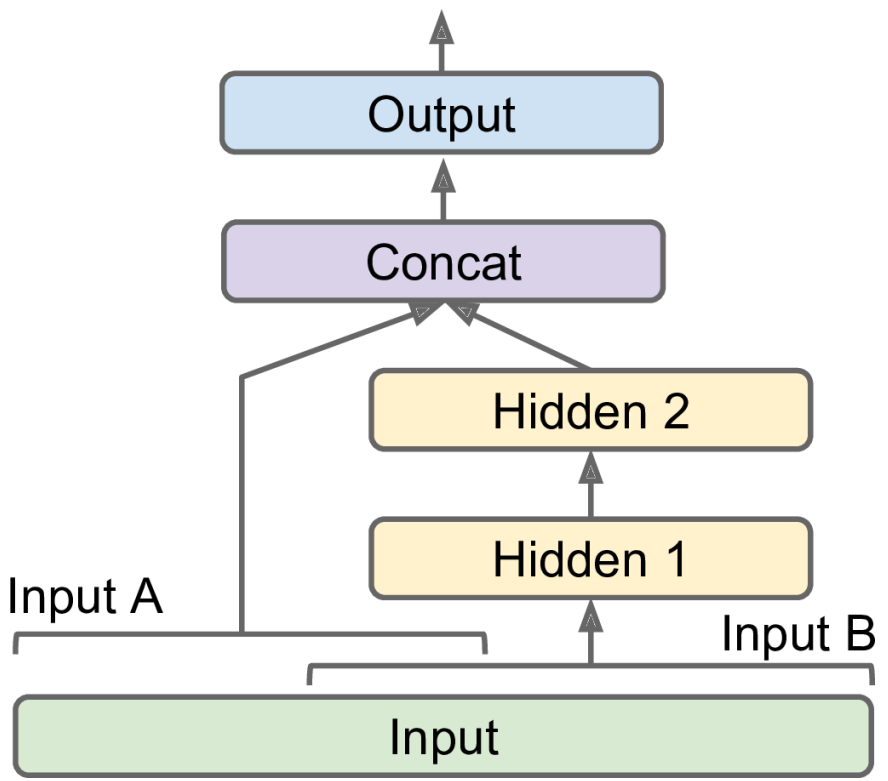


Tenga en cuenta que hemos especificado inputs=[input_A, input_B] al crear el modelo. Ahora podemos compilar el modelo como siempre, pero cuando llamamos al método fit(), en lugar de pasar una única matriz de entrada X_train, debemos pasar un par de matrices (X_train_A, X_train_B): una por entrada. Lo mismo ocurre con X_valid, y también con X_test y X_new cuando se llama a evaluate() o predict():

In [20]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [21]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4644 - val_loss: 0.4315

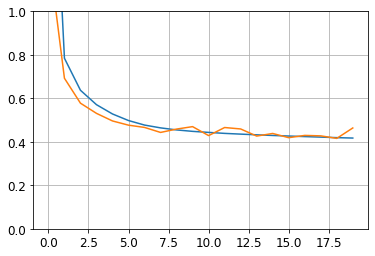

In [53]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
y_pred = model.predict((X_new_A, X_new_B))
y_pred

array([[0.30591226],
       [1.9540672 ],
       [3.4426105 ]], dtype=float32)

# 3. Configuración

También hay muchos casos de uso en los que puede querer tener múltiples salidas: 
- La tarea puede exigirlo; por ejemplo, puede querer localizar y clasificar el objeto principal de una imagen. Esto es tanto una tarea de regresión (encontrar las coordenadas del centro del objeto, así como su anchura y altura) como una tarea de clasificación.

- Del mismo modo, es posible que tenga que realizar varias tareas independientes basadas en los mismos datos. Por supuesto, podría entrenar una red neuronal por tarea, pero en muchos casos obtendrá mejores resultados en todas las tareas entrenando una única red neuronal con una salida por tarea. Esto se debe a que la red neuronal puede aprender características en los datos que son útiles en todas las tareas. 

- Otro caso de uso es como técnica de regularización (es decir, una restricción de entrenamiento cuyo objetivo es reducir el sobreajuste y mejorar así la capacidad de generalización del modelo).

Por ejemplo, es posible que desee añadir algunas salidas auxiliares en una arquitectura de red neuronal (véase la siguiente Figura) para garantizar que la parte subyacente de la red aprenda algo útil por sí misma, sin depender del resto de la red. 

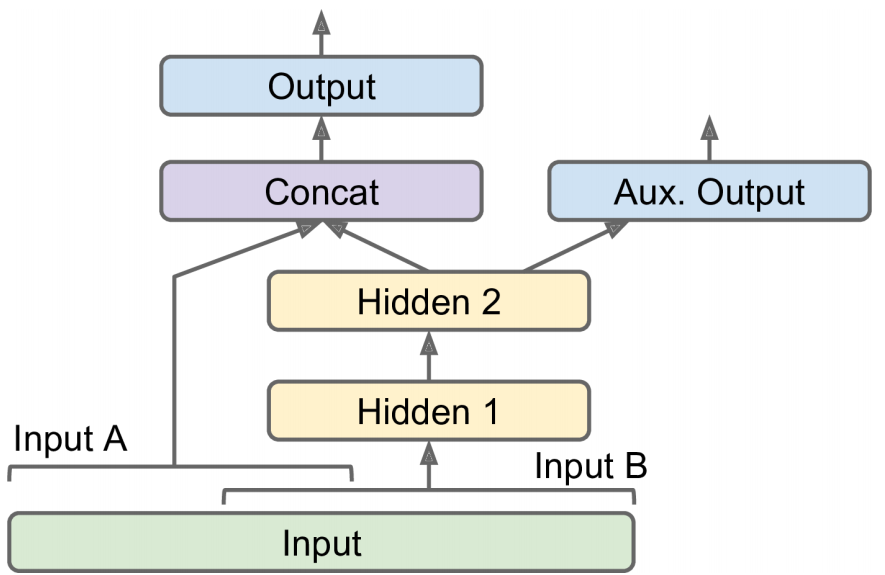

In [28]:
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],outputs=[output, aux_output])

Cada salida necesitará su propia función de pérdida, por lo que cuando compilemos el modelo deberemos pasar una lista de pérdidas (si pasamos una sola pérdida, Keras asumirá que se debe usar la misma pérdida para todas las salidas). Por defecto, Keras calculará todas estas pérdidas y simplemente las sumará para para obtener la pérdida final utilizada para el entrenamiento. 

In [30]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [31]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

In [32]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


In [33]:
y_pred_main

array([[0.26762417],
       [1.980763  ],
       [3.3396287 ]], dtype=float32)

In [34]:
y_pred_aux

array([[0.95936495],
       [1.9240991 ],
       [2.5152814 ]], dtype=float32)